 # medcost predcit
 ## por que escolher o dataset 
 alem de ser um dataset bem documentado e ser um datasaet de usabilidade alta mesmo com alto numero de pessoas voltando ele possui a variavel target numerica por conta de usar regressao linear ser um requisito em importante 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import scipy.stats as sts
import joblib 


In [ ]:
df = pd.read_csv('C:/medical-cost-predict/insurance.csv')
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: xlabel='age', ylabel='Count'>

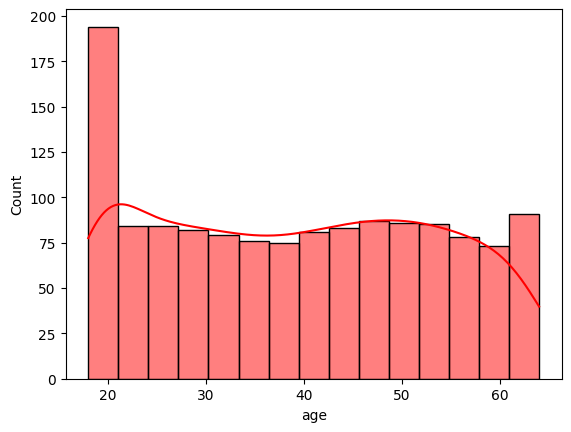

In [ ]:
sns.histplot(df['age'], kde=True, bins=15,color='red')

aqui pode se observar que maiior part da população esta nos entre 18 e 23

In [ ]:
df["categoria_bmi"] = pd.cut(
    df["bmi"],
    bins=[0, 18.5, 25, 30, float("inf")],
    labels=["Abaixo do peso", "Peso normal", "Sobrepeso", "Obesidade"]
)

<Axes: xlabel='age', ylabel='charges'>

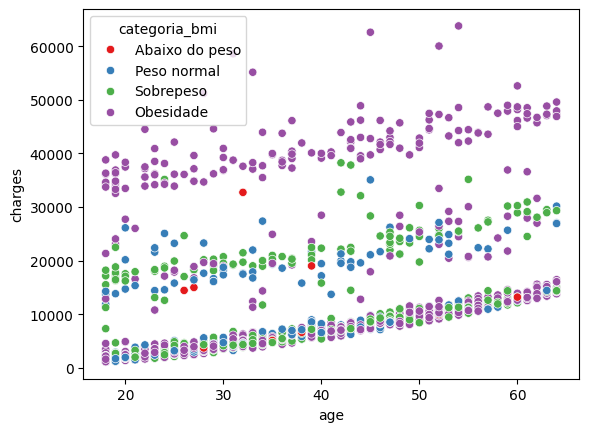

In [ ]:
sns.scatterplot(x='age', y='charges', data=df,hue='categoria_bmi',palette='Set1')

O peso  tem muita influencia nas dispesas

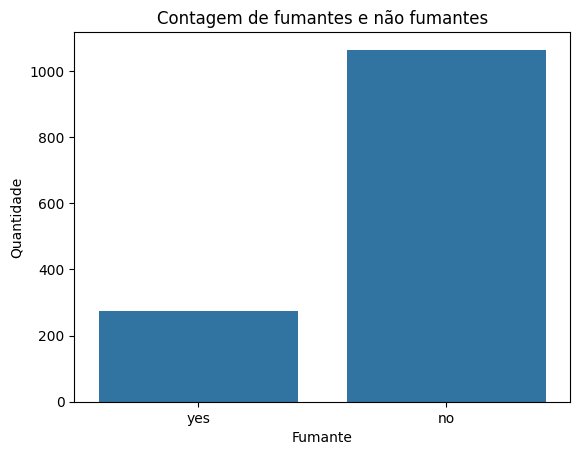

In [ ]:
sns.countplot(x='smoker', data=df)
plt.title('Contagem de fumantes e não fumantes')
plt.xlabel('Fumante')
plt.ylabel('Quantidade')
plt.show()

Text(0.5, 1.0, 'Custo médio por fumante e não fumante')

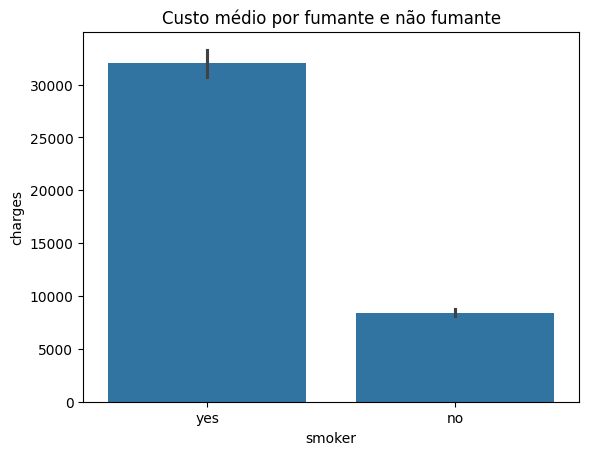

In [ ]:
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Custo médio por fumante e não fumante')

hippotese de que o valor pago pelo fumantes e maior do que os que não fuman 
ou seja 
$$
xnf<xyf
$$
$$
h0=xnf=xyf
$$

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,categoria_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,Sobrepeso
1,18,male,33.770,1,no,southeast,1725.55230,Obesidade
2,28,male,33.000,3,no,southeast,4449.46200,Obesidade
3,33,male,22.705,0,no,northwest,21984.47061,Peso normal
4,32,male,28.880,0,no,northwest,3866.85520,Sobrepeso


In [ ]:
fum = df[df["smoker"]=="yes"]["charges"]
n_fum = df[df["smoker"]=="no"]["charges"]


p=sts.ttest_ind(fum,n_fum,alternative="greater",equal_var=False).pvalue

if p<0.05:
        print("h0 reijeitado")


h0 reijeitado


de acordo com o pvalor e tenho evdencias estaticas para rejeitar o h0

Os fumantes pagam valores mais altos do que os não fumantes

a interpretação que podemos ter aquie e que baasicamente os fumantes por serem um grupo de risco pagam mais provavementepelo tratamento de doencças pulmanares

<Axes: xlabel='age', ylabel='charges'>

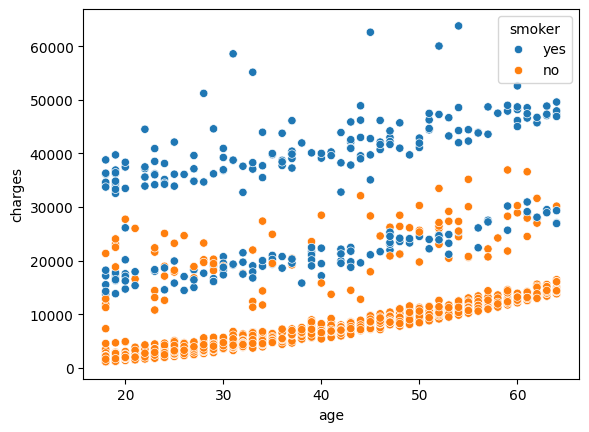

In [ ]:
sns.scatterplot(x='age', y='charges', data=df,hue='smoker')

Text(0.5, 1.0, 'Contagem por região')

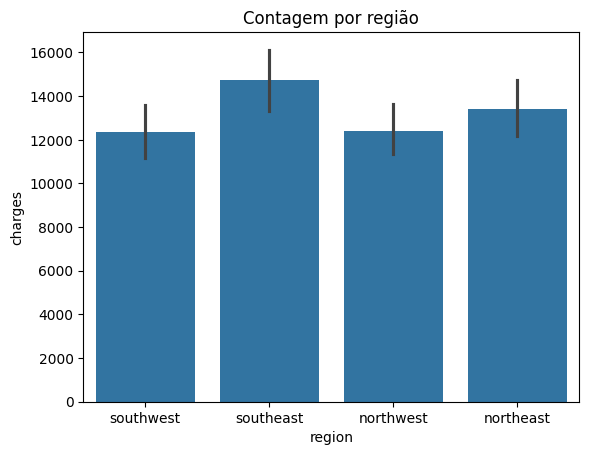

In [ ]:
sns.barplot(data=df,x='region', y='charges')
plt.title('Contagem por região')

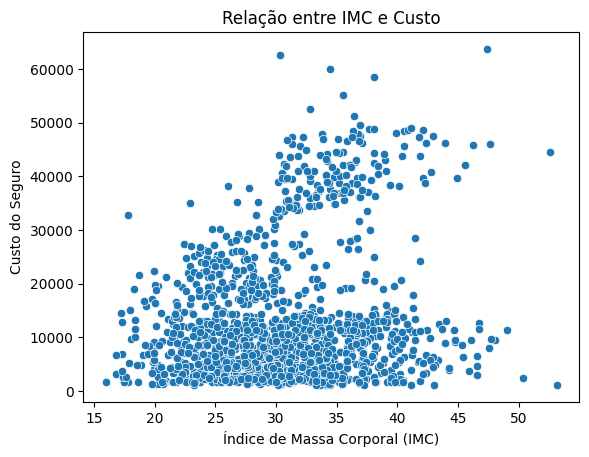

In [ ]:
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Relação entre IMC e Custo')
plt.xlabel('Índice de Massa Corporal (IMC)')
plt.ylabel('Custo do Seguro')
plt.show()

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,categoria_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,Sobrepeso
1,18,male,33.770,1,no,southeast,1725.55230,Obesidade
2,28,male,33.000,3,no,southeast,4449.46200,Obesidade
3,33,male,22.705,0,no,northwest,21984.47061,Peso normal
4,32,male,28.880,0,no,northwest,3866.85520,Sobrepeso


<Axes: >

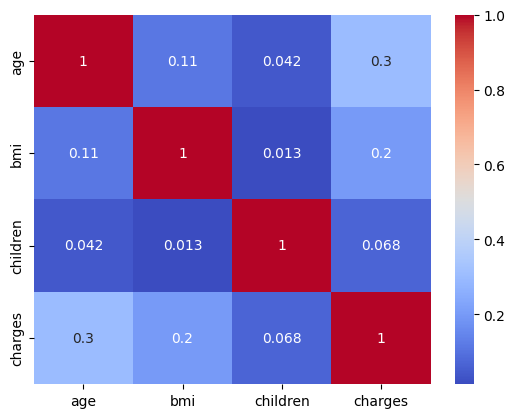

In [ ]:
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(), annot=True, cmap='coolwarm')

C:\Users\rozan\AppData\Local\Temp\ipykernel_17732\1273160659.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


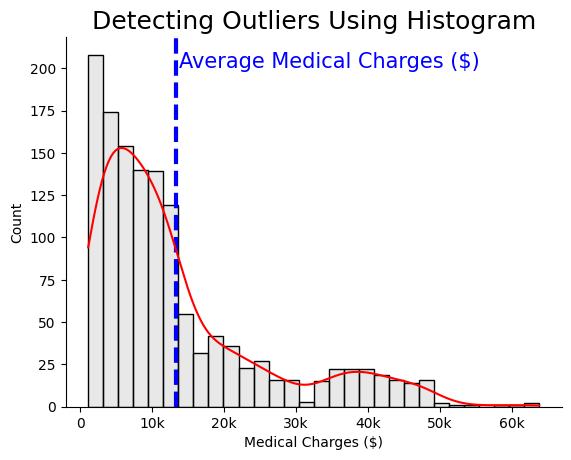

In [ ]:
ax = sns.histplot(df['charges'], kde=True, color='lightgray')
xticks = plt.gca().get_xticks()
xlabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in xticks]
plt.gca().set_xticklabels(xlabels)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);
ax.lines[0].set_color('red')
plt.axvline(df['charges'].mean(), linestyle='--', lw=3, zorder=1, color='blue')
plt.annotate(f'Average Medical Charges ($)', (13700, 200), fontsize=15, color='blue')
plt.title('Detecting Outliers Using Histogram', fontsize=18)
plt.xlabel('Medical Charges ($)')
plt.show()

O numero de criancas provavelmente nao esta afetando nas dispesas 

# processamento de dados

In [ ]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


df_sem_outliers = df[(df['charges'] >= limite_inferior) & (df['charges'] <= limite_superior)]



In [ ]:
x= df.iloc[:,1:6]
y= df.iloc[:,6]

In [ ]:
x_categorical = x.select_dtypes(include=['object'])

x_categorical.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [ ]:
encoder = OneHotEncoder( handle_unknown='ignore')
x_encoded = encoder.fit_transform(x_categorical)

categorical_cols = ["sex", "smoker", "region"]

x_encoded = pd.DataFrame(
    x_encoded.toarray(),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=x.index
)



x = pd.concat([x.drop(columns=categorical_cols), x_encoded], axis=1)


x.head()

,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42)
xgb.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:

resultados_random_forest = []
resultados_svm = []
resultados_xgb = []
resultados_regressao_linear = []

for i in range(30):
  print(i)
  
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
  scores = cross_val_score(arvore, x_scaled, y, cv = kfold)

  resultados_random_forest.append(scores.mean())

  svm = SVR(kernel="rbf", C=100, epsilon=0.1)
  scores = cross_val_score(svm, x_scaled, y, cv = kfold)
  resultados_svm.append(scores.mean())

  xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42)
  scores = cross_val_score(xgb, x_scaled, y, cv = kfold)
  resultados_xgb.append(scores.mean())

  regressao_linear = LinearRegression()
  scores = cross_val_score(regressao_linear, x_scaled, y, cv = kfold)
  resultados_regressao_linear.append(scores.mean())


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [ ]:
resutados =pd.DataFrame({
    'Random Forest':resultados_random_forest,
    'SVM':resultados_svm,
    'XGBoost':resultados_xgb,
    'Regressão Linear':resultados_regressao_linear
})
resutados.describe()

,Random Forest,SVM,XGBoost,Regressão Linear
count,30.000000,30.000000,30.000000,30.000000
mean,0.735578,0.324018,0.727272,0.651085
std,0.003945,0.002126,0.005373,0.004701
min,0.726915,0.318019,0.715153,0.637809
25%,0.734048,0.323116,0.723551,0.649076
50%,0.735578,0.324402,0.727360,0.652299
75%,0.738201,0.325393,0.731787,0.654139
max,0.743729,0.328917,0.736115,0.658945


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(x_train, y_train)


RandomForestRegressor(n_estimators=300, random_state=42)

In [ ]:
from sklearn.svm import SVR

svm = SVR(kernel="rbf", C=100, epsilon=0.1)
svm.fit(x_train , y_train)


SVR(C=100)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

modelos = {"XGBoost": xgb, "Random Forest": rf, "SVM": svm}

for nome, modelo in modelos.items():
    if nome == "SVM":
        y_pred = modelo.predict(x_test)
    else:
        y_pred = modelo.predict(x_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{nome} -> RMSE: {rmse:.2f}, R²: {r2:.2f}")


XGBoost -> RMSE: 6015.26, R²: 0.77
Random Forest -> RMSE: 6343.97, R²: 0.74
SVM -> RMSE: 10239.99, R²: 0.32


In [5]:
modelo = RandomForestRegressor(x=x_scaled,y=y)

NameError: name 'x_scaled' is not defined